<a href="https://colab.research.google.com/github/alf-faren/Delirium_Data/blob/master/Build_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, I am going to exlore which class and ascendancy is the most popular within the top 8000 players across the 4 leagues in Delirium. We will be questioning at what level(s) do players mostly die at and is that dependant on their class and ascendancy.

# Importing the necessary libraries and reading in the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# importing the necessary libraries

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/alf-faren/Delirium_Data/master/Delirium%20data.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Character,Ascendancy,Level,Dead,League
0,Toaster_HomeOffice,Assassin,100,NaN,HC
1,fÍxÍt_BestMinerEver,Saboteur,100,NaN,HC
2,KyKiske_BestSupportEver,Guardian,100,NaN,HC
3,______Benediction______,Occultist,100,NaN,HC
4,PXHdpzLgmW,Guardian,100,NaN,HC


# Turning NaN values to 0
# Changing Dead = True to 1 and Dead = False to 0

In [ ]:
df.fillna(0, inplace=True) # turning NaN values to 0

In [ ]:
df.Dead = df.Dead.replace({True: 1}) # changing Dead = True to 1 and Dead = False to 0

In [ ]:
df.sample(10)

,Character,Ascendancy,Level,Dead,League
6320,ManaStorm_to_Heralds,Guardian,98,0,SSF SC
2398,TaxPandemic,Champion,96,1,SSF HC
6062,KonGHundra,Trickster,100,0,SSF SC
6845,Braunfeuli,Necromancer,96,0,SSF SC
7564,SSFTemplarSirdec,Hierophant,95,0,SSF SC
2816,SSFRoundTwo,Necromancer,95,0,SSF HC
1946,KJ_OnlyThingIKnow,Guardian,96,1,HC
2920,Forensics,Gladiator,94,1,SSF HC
4491,깔깔시너지,Assassin,100,0,SC
7886,fdgjhbfgh,Trickster,95,0,SSF SC


# Total size of data set

In [ ]:
df.shape

(8000, 5)

In [ ]:
df_league=df.groupby('League')
df_league.size()

League
HC        2000
SC        2000
SSF HC    2000
SSF SC    2000
dtype: int64

# Finding out how many players are playing each ascendancy

In [ ]:
df_ascend=df.groupby('Ascendancy')
df_ascend.size()

Ascendancy
Ascendant        419
Assassin         410
Berserker        137
Champion         642
Chieftain         93
Deadeye          167
Elementalist     137
Gladiator        824
Guardian        1523
Hierophant       875
Inquisitor        70
Juggernaut       336
Necromancer      805
Occultist        306
Pathfinder       101
Raider            79
Saboteur         260
Scion              2
Slayer           151
Templar            1
Trickster        662
dtype: int64

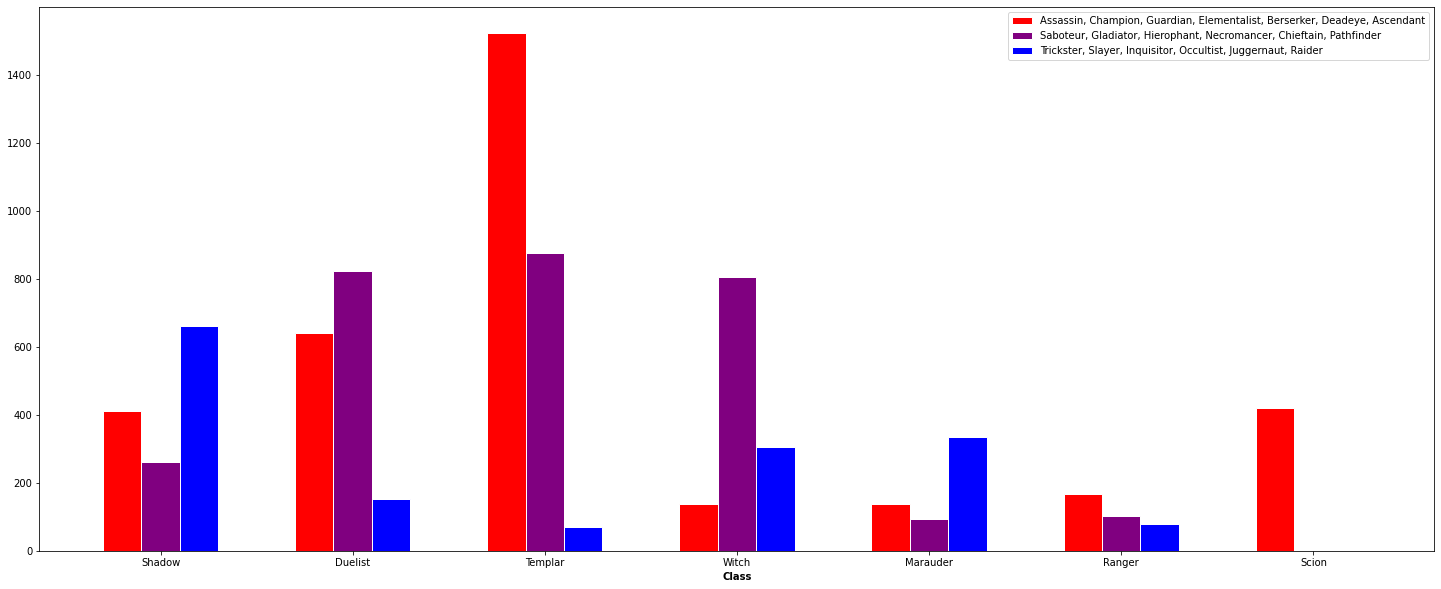

In [ ]:
barWidth = 0.2
plt.figure(figsize=(25,10)) 

bars1 = [410,642,1523,137,137,167,420]
bars2 = [260,824,875,805,93,101,0]
bars3 = [662,151,71,306,336,79,0]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Assassin, Champion, Guardian, Elementalist, Berserker, Deadeye, Ascendant')
plt.bar(r2, bars2, color='purple', width=barWidth, edgecolor='white', label='Saboteur, Gladiator, Hierophant, Necromancer, Chieftain, Pathfinder')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Trickster, Slayer, Inquisitor, Occultist, Juggernaut, Raider')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Shadow', 'Duelist', 'Templar', 'Witch', 'Marauder', 'Ranger', 'Scion'])
 
plt.legend()
plt.show()

# a bar plot on how many players are playing each ascendancy of each class

# Sorting the ascendancies by leagues

In [ ]:
def sort(division):
    divisionclass = df_league.get_group(division).groupby('Ascendancy')
    ordered_data = pd.DataFrame(0, index=np.arange(len(divisionclass.size())), columns=['Ascendancy','Amount'])
    ordered_data['Ascendancy'] = divisionclass.size().index
    for i in range(len(ordered_data)):
        ordered_data.iat[i,1] =  int(divisionclass.size()[i])
    ordered_data = ordered_data.sort_values(by = 'Amount', ascending=False)
    return ordered_data


In [ ]:
sort('SC').head(17)

,Ascendancy,Amount
8,Guardian,595
1,Assassin,227
5,Deadeye,136
0,Ascendant,117
12,Necromancer,112
9,Hierophant,105
19,Trickster,89
3,Champion,86
7,Gladiator,83
13,Occultist,83


In [ ]:
sort('HC').head(17)

,Ascendancy,Amount
8,Guardian,515
12,Necromancer,203
3,Champion,183
19,Trickster,182
7,Gladiator,171
0,Ascendant,161
11,Juggernaut,156
9,Hierophant,101
13,Occultist,94
16,Saboteur,60


In [ ]:
sort('SSF SC').head(17)

,Ascendancy,Amount
9,Hierophant,381
8,Guardian,287
7,Gladiator,232
12,Necromancer,194
19,Trickster,191
3,Champion,165
0,Ascendant,102
1,Assassin,85
16,Saboteur,71
13,Occultist,67


In [ ]:
sort('SSF HC').head(17)

,Ascendancy,Amount
7,Gladiator,338
12,Necromancer,296
9,Hierophant,288
3,Champion,208
18,Trickster,200
8,Guardian,126
11,Juggernaut,111
16,Saboteur,75
13,Occultist,62
1,Assassin,47


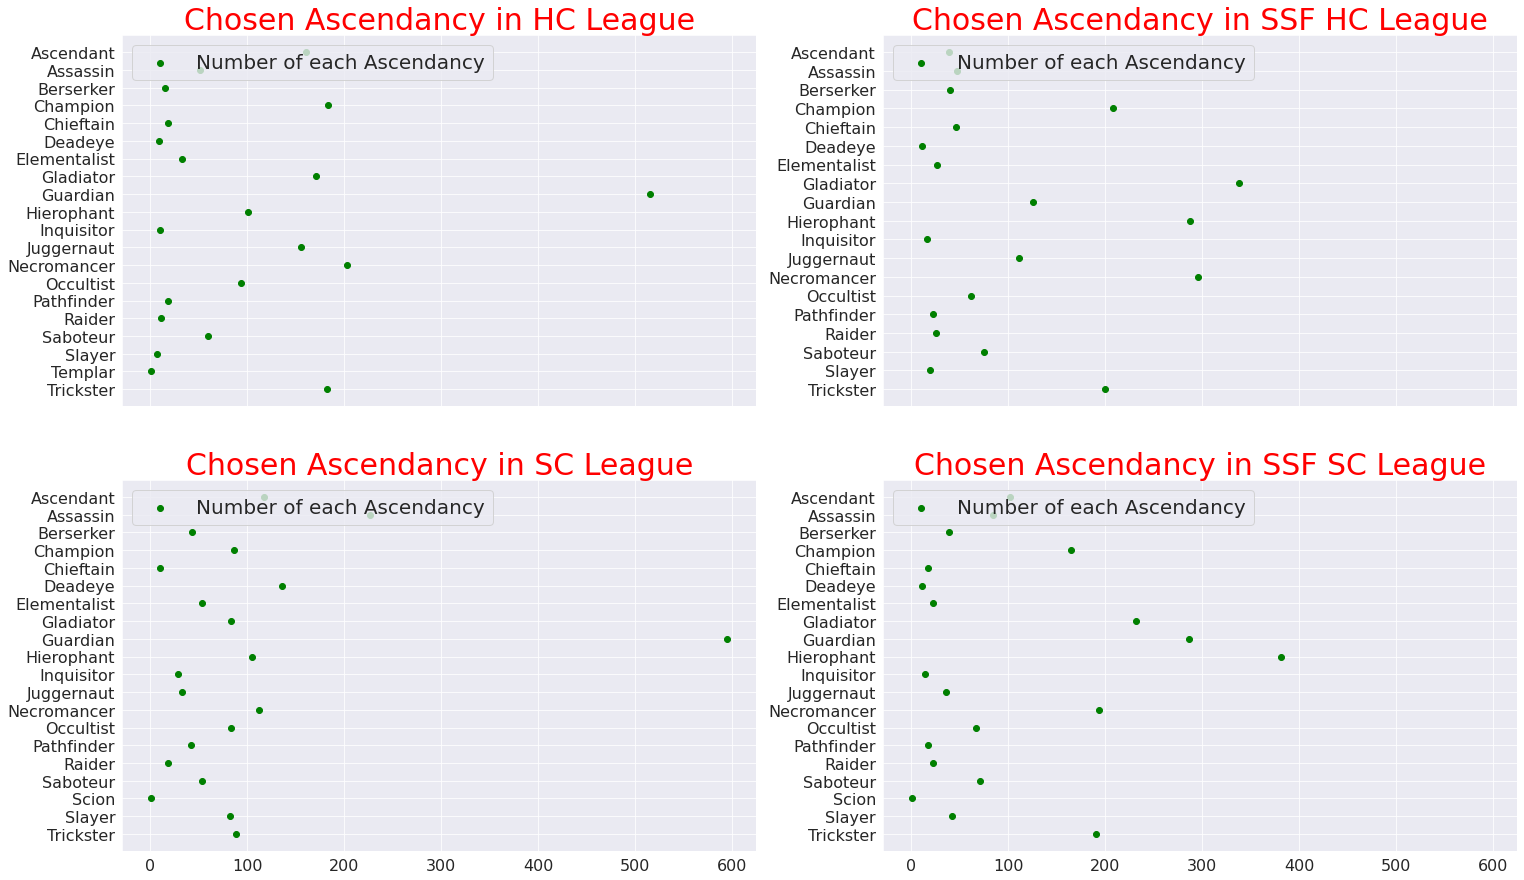

In [ ]:
sns.set_style('darkgrid', {'axis.facecolor':'black'})
f, axes=plt.subplots(2,2,figsize=(25,15), sharex=True)
DivisionList = df['League'].unique()
times=0
for i in range(2):
  for j in range(2):
    plt.sca(axes[i,j])
    plot_data = sort(DivisionList[times])
    x = plot_data['Amount']
    y = len(plot_data.index) - plot_data.index
    labels = plot_data['Ascendancy']
    plt.scatter(x, y, color = 'g', label = 'Number of each Ascendancy')
    plt.xticks(size=16)
    plt.yticks(y, labels, fontsize = 16)
    plt.title('Chosen Ascendancy in '+ DivisionList[times] +' League', fontsize = 30, color = 'red')
    plt.legend(loc = 2, fontsize = 20)
    times = times+1
plt.show()

In [ ]:
lvlclass = pd.crosstab(df['Level'],df['Ascendancy'])
lvlclass

Ascendancy,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Necromancer,Occultist,Pathfinder,Raider,Saboteur,Scion,Slayer,Templar,Trickster
Level,,,,,,,,,,,,,,,,,,,,,
92,4,4,5,14,4,1,2,25,5,24,1,5,28,8,0,3,7,0,4,0,19
93,10,12,10,68,18,4,6,109,15,76,3,30,106,11,4,3,25,0,2,0,64
94,3,11,10,46,9,3,6,60,25,70,4,18,59,10,6,6,7,0,3,0,42
95,18,48,21,108,10,3,18,170,65,236,7,42,148,50,15,17,43,0,24,0,121
96,45,36,17,114,21,6,14,141,154,134,11,80,128,44,12,12,41,0,15,0,113
97,37,31,17,110,9,6,21,105,177,114,6,61,108,37,10,6,38,0,7,0,96
98,66,12,7,49,3,3,8,46,157,53,3,35,66,23,4,6,18,0,2,0,48
99,27,7,3,20,4,0,0,24,98,30,2,16,19,21,6,1,7,0,1,0,22
100,209,249,47,113,15,141,62,144,827,138,33,49,143,102,44,25,74,2,93,1,137


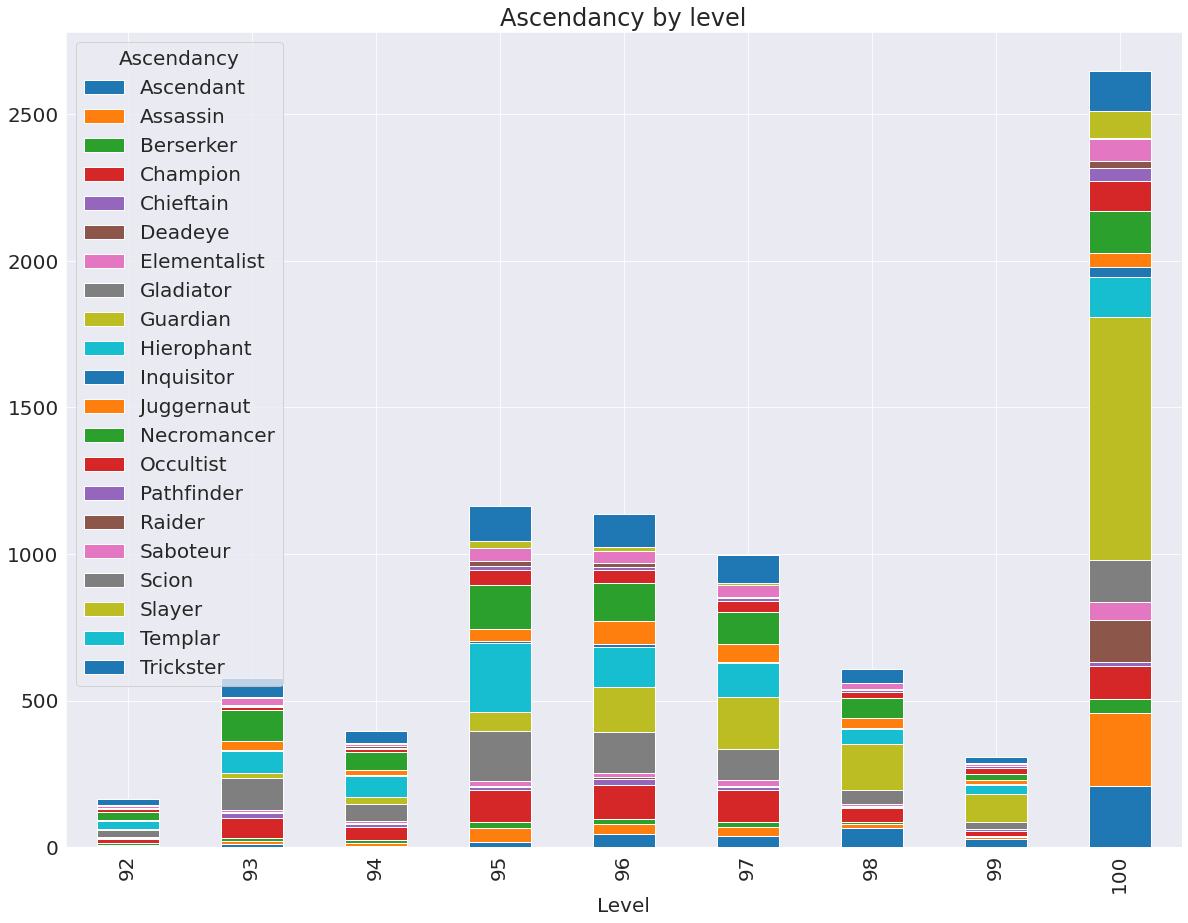

In [ ]:
(df.pivot_table(index='Level', columns='Ascendancy', values='Class',
               aggfunc='count', fill_value=0)
    .plot.bar(stacked=True, figsize=(20,15),title='Ascendancy by level')
);

# Sorting each ascendancy to their respective base class

In [ ]:
df['Class'] = ''

In [ ]:
df.loc[df['Ascendancy']=='Assassin','Class'] = 'Shadow'
df.loc[df['Ascendancy']=='Trickster','Class'] = 'Shadow'
df.loc[df['Ascendancy']=='Saboteur','Class'] = 'Shadow'

df.loc[df['Ascendancy']=='Gladiator','Class'] = 'Duelist'
df.loc[df['Ascendancy']=='Slayer','Class'] = 'Duelist'
df.loc[df['Ascendancy']=='Champion','Class'] = 'Duelist'

df.loc[df['Ascendancy']=='Necromancer','Class'] = 'Witch'
df.loc[df['Ascendancy']=='Occultist','Class'] = 'Witch'
df.loc[df['Ascendancy']=='Elementalist','Class'] = 'Witch'

df.loc[df['Ascendancy']=='Deadeye','Class'] = 'Ranger'
df.loc[df['Ascendancy']=='Raider','Class'] = 'Ranger'
df.loc[df['Ascendancy']=='Pathfinder','Class'] = 'Ranger'

df.loc[df['Ascendancy']=='Inquisitor','Class'] = 'Templar'
df.loc[df['Ascendancy']=='Hierophant','Class'] = 'Templar'
df.loc[df['Ascendancy']=='Guardian','Class'] = 'Templar'

df.loc[df['Ascendancy']=='Juggernaut','Class'] = 'Marauder'
df.loc[df['Ascendancy']=='Berserker','Class'] = 'Marauder'
df.loc[df['Ascendancy']=='Chieftain','Class'] = 'Marauder'

df.loc[df['Ascendancy']=='Ascendant','Class'] = 'Scion'

In [ ]:
df.sample(20)

,Character,Ascendancy,Level,Dead,League,Class
137,AskonMineri,Saboteur,100,1,HC,Shadow
1215,Laa_blae,Trickster,97,1,HC,Shadow
5862,BladeWooshWoosh,Assassin,100,0,SC,Shadow
179,CaughtWithMyFlasksDown,Ascendant,100,0,HC,Scion
3822,hmm_ssf_cremaii,Chieftain,93,1,SSF HC,Marauder
7910,KelsierTheMistborn,Trickster,95,0,SSF SC,Shadow
626,OPBuildYeet,Guardian,98,1,HC,Templar
6415,ZyphxSCGaymer,Gladiator,98,0,SSF SC,Duelist
2163,DYFYDFKOZVIFZDJLCZUHBUB,Juggernaut,98,0,SSF HC,Marauder
2438,BrooksOldMan,Guardian,96,1,SSF HC,Templar


In [ ]:
classcount = df.groupby('Class')['Class'].count()
classcount

Class
               3
Duelist     1617
Marauder     566
Ranger       347
Scion        419
Shadow      1332
Templar     2468
Witch       1248
Name: Class, dtype: int64

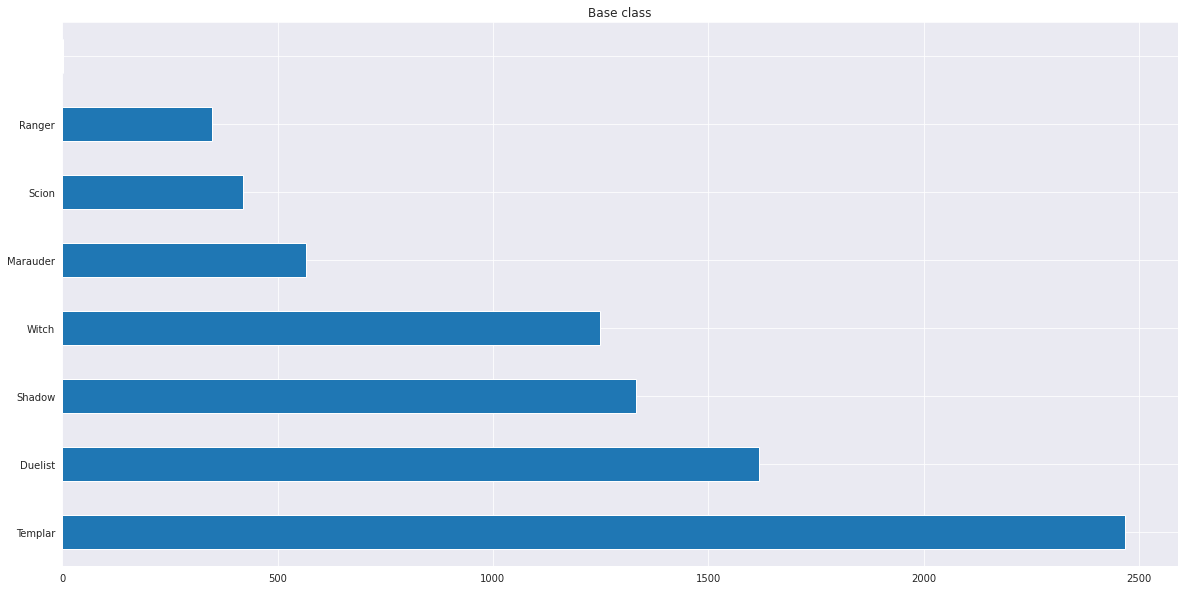

In [ ]:
plt.figure(figsize=(20,10)) 
df['Class'].value_counts().plot(kind='barh', title='Base class');

# Figuring out the deaths per league/level/ascendancy

In [ ]:
lvldead = pd.crosstab([df['League'], df['Level']], df['Dead'], margins=True)
lvldead

Dead             0     1   All
League Level                  
HC     96      168   383   551
       97      169   343   512
       98      139   211   350
       99       71   113   184
       100     331    72   403
SC     100    2000     0  2000
SSF HC 92       32   131   163
       93      116   460   576
       94       94   304   398
       95       80   266   346
       96       43   141   184
       97       34   101   135
       98       23    53    76
       99       12    31    43
       100      63    16    79
SSF SC 95      818     0   818
       96      403     0   403
       97      349     0   349
       98      183     0   183
       99       81     0    81
       100     166     0   166
All           5375  2625  8000

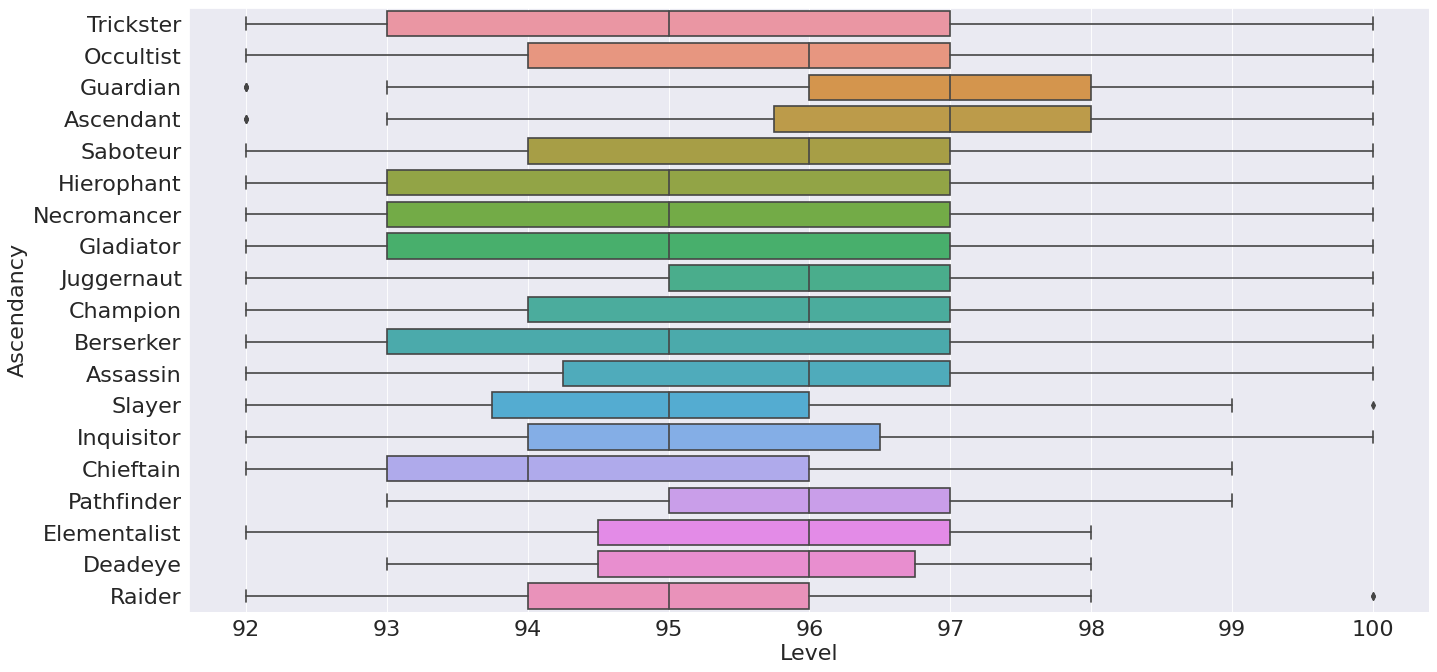

In [ ]:
died = df[df['Dead']==True]
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(data=died, y='Ascendancy', x ='Level')

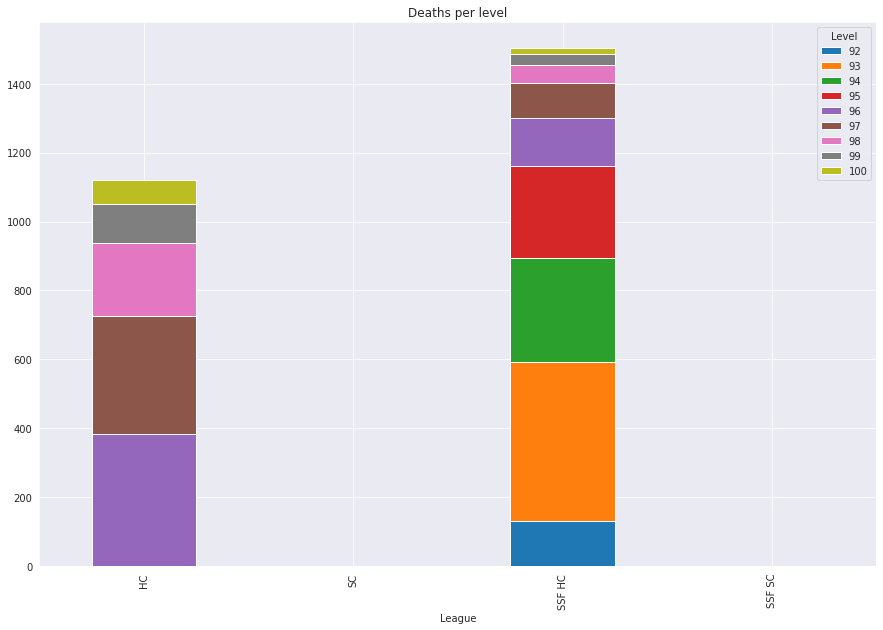

In [ ]:
(df.pivot_table(index='League', columns='Level', values='Dead',
               aggfunc='sum', fill_value=0)
    .plot.bar(stacked=True, figsize=(15,10),title='Deaths per level')
);

In [ ]:
cl_dead = pd.crosstab([df['Class'],df['Level']],df['Dead'], margins=True)
cl_dead.head(60)

Dead              0    1  All
Class    Level               
         100      3    0    3
Duelist  92      11   32   43
         93      44  135  179
         94      31   78  109
         95     220   82  302
         96     149  121  270
         97     118  104  222
         98      48   49   97
         99      21   24   45
         100    339   11  350
Marauder 92       2   12   14
         93       8   50   58
         94      12   25   37
         95      46   27   73
         96      56   62  118
         97      42   45   87
         98      22   23   45
         99      11   12   23
         100    105    6  111
Ranger   92       3    1    4
         93       4    7   11
         94       6    9   15
         95      23   12   35
         96      14   16   30
         97      15    7   22
         98       8    5   13
         99       4    3    7
         100    208    2  210
Scion    92       0    4    4
         93       2    8   10
         94       0    3    3
         95      14    4   18
         96      33   12   45
         97      19   18   37
         98      51   15   66
         99      19    8   27
         100    205    4  209
Shadow   92       8   22   30
         93      22   79  101
         94      14   46   60
         95     173   39  212
         96     106   84  190
         97      98   67  165
         98      45   33   78
         99      16   20   36
         100    445   15  460
Templar  92       4   26   30
         93      13   81   94
         94      13   86   99
         95     257   51  308
         96     167  132  299
         97     169  128  297
         98     123   90  213
         99      74   56  130
         100    956   42  998
Witch    92       4   34   38
         93      23  100  123
         94      18   57   75
         95     165   51  216
         96      89   97  186

In [ ]:
cl_dead.tail(10)

Dead            0     1   All
Class Level                  
Witch 92        4    34    38
      93       23   100   123
      94       18    57    75
      95      165    51   216
      96       89    97   186
      97       91    75   166
      98       48    49    97
      99       19    21    40
      100     299     8   307
All          5375  2625  8000

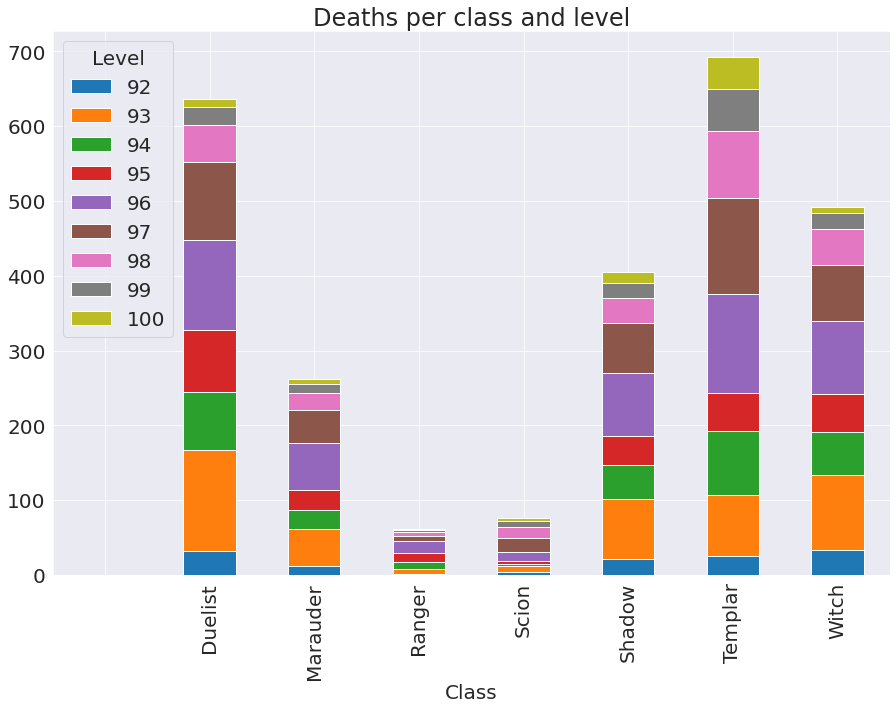

In [ ]:
(df.pivot_table(index='Class', columns='Level', values='Dead',
               aggfunc='sum', fill_value=0)
    .plot.bar(stacked=True, figsize=(15,10),title='Deaths per class and level')
);

In [ ]:
asc_dead = pd.crosstab([df['League'],df['Ascendancy']], df['Dead'], margins=True)
asc_dead

Dead                  0     1   All
League Ascendancy                  
HC     Ascendant    115    46   161
       Assassin      27    24    51
       Berserker      4    11    15
       Champion      71   112   183
       Chieftain      5    14    19
...                 ...   ...   ...
SSF SC Saboteur      71     0    71
       Scion          1     0     1
       Slayer        42     0    42
       Trickster    191     0   191
All                5375  2625  8000

[80 rows x 3 columns]

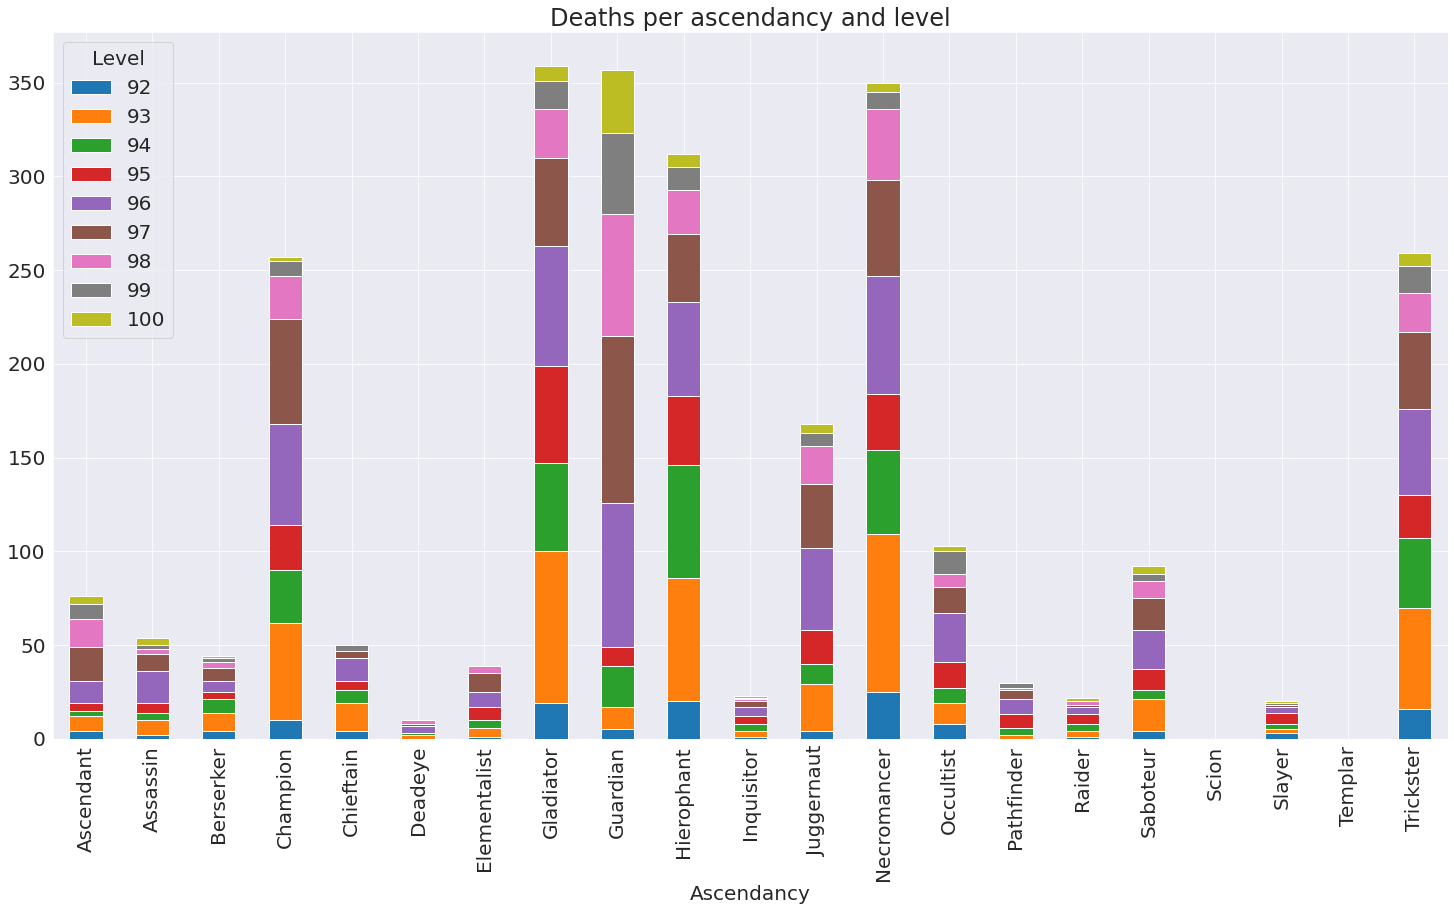

In [ ]:
(df.pivot_table(index='Ascendancy', columns='Level', values='Dead',
               aggfunc='sum', fill_value=0)
    .plot.bar(stacked=True, figsize=(25,13),title='Deaths per ascendancy and level')
);